# Раздел 5. Уравнения с частными производными гиперболического типа.
## Лабораторная рабода №5. Методы решения уравнения переноса. 
### Вариант 3, задание 9.
_Яромир Водзяновский_

## Аналитическое решение 
Дифференциальная задача:
$$ \frac{\partial u}{\partial t} - 4\frac{\partial u}{\partial x} = x; \;\;\; 0 < t \leq 1,\; 0 \leq x \leq 1 $$
$$u(x,0) = \sin{x} - 0.125x^2; \;\; u(1,t) = \sin{(1+4t)} - 0.125$$

Аналитическое решение:
$$u(x,t) = \sin{(4t+x)} - \frac{x^2}{8}$$

## Численное решение
Разностная схема:
$$D_h = \left\{ (x_l,t^n): x_l = hl, hL = 1, l = \overline{0,L};\; t^n = n\tau, \tau N=1,n = \overline{0,N} \right \} $$

$$u_l^{n+1} = u_l^n + \frac{2\tau}{3h} \left( 2u_{l+3}^n - 9u_{l+2}^n + 18u_{l+1}^n - 11u_l^n \right) + \frac{8\tau^2}{h^2}  \left( -u_{l+3}^n +4u_{l+2}^n -5u_{l+1}^n +2u_l^n  \right) + \frac{32\tau^3}{3h^3} \left(u_{l+3}^n -3u_{l+2}^n +3u_{l+1}^n -u_l^n  \right) + \tau x_l + 2\tau^2, \;\;\;\;\;\;\;\; l = \overline{0,L-3}, n = \overline{0,N-1}$$

$$u_l^0 = \sin{x_l} - 0.125x_l^2 = \varphi_l, \; l = \overline{0,L}; \;\; u_L^n = \sin{(1+4t^n)} -0.125 = \psi^n,\;n=\overline{1,N}  $$

$$u_{L-1}^n = ?,\; n = \overline{1,N}; \;\;\; u_{L-2}^n =?,\; n = \overline{1,N}. $$

Поиск $u_{L-1}^n, \; u_{L-2}^n$:

$$[u]_{L-1}^n = [u]_L^n - [u'_x]_L^n h - [u''_{xx}]_L^n \frac{h^2}{2} - [u'''_{xxx}]_L^n \frac{h^3}{6}$$
$$[u]_{L-2}^n = [u]_L^n - [u'_x]_L^n (2h) - [u''_{xx}]_L^n \frac{(2h)^2}{2} - [u'''_{xxx}]_L^n \frac{(2h)^3}{6}$$

Выразим производные по координате через производные по времени:

$$[u'_x]_L^n = \frac{1}{a_L^n} \left( -(\dot \psi_t)^n+ b_L^n \right), \;\;\;[u''_x]_L^n = \frac{1}{(a_L^n)^2} \left \{ (\ddot \psi_{tt})^n + a_L^n(b'_x)_L^n \right \}, \;\;\; [u'''_{xxx}]_L^n = -\frac{1}{(a_L^n)^3}(\dddot \psi_{ttt})^n,$$

где $a_L^n = -4, \;\; b_L^n = x_L$

Условие спектральной устойчивости:
$$\tau \leq \frac{2h}{a}$$
В нашем случае число Куранта 
$$K = \tau/ h \leq 0.5$$

In [192]:
import numpy as np 
from matplotlib import pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

In [206]:
def anal(x,t):
    return np.sin(4*t + x) - x**2 / 8

In [550]:
L = 20
K = 0.25
N = int(L/K)
h = 1/L
tau = 1/N
a = -4

In [551]:
x = np.arange(0,1+1/(10*L),1/L)
t = np.arange(0,1+1/(10*N),1/N)

In [552]:
condition = abs(2*h/a)
def check():
    if tau <= condition:
        return 'Устойчиво'
    else:
        return 'Не устойчиво'
check()

'Устойчиво'

In [553]:
psi = np.sin(1+4*t) - 0.125
psi_der1 = 4*np.cos(1+4*t)
psi_der2 = -16*np.sin(1+4*t)
psi_der3 = -64*np.cos(1+4*t)
b = x
b_der1 = 1
phi = np.sin(x)-0.125*x**2

u_der1 =  1/a * (-psi_der1 + b[L])
           
u_der2 = 1/a**2 * (psi_der2 + a)

u_der3 = -1/a**3 * psi_der3
pd.set_option('display.float_format', lambda x: '{:.5E}'.format(x))

In [554]:
t_a = []
for i in range(N+1):
    for j in range(L+1):
        t_a.append(t[i])
t_a = np.array(t_a)

x_a = np.array([])
for i in range(N+1):
    x_a = np.concatenate((x_a,x))

U_an = np.vectorize(anal)(x_a,t_a).reshape((N+1,L+1))   
U_anal = pd.DataFrame(np.vectorize(anal)(x_a,t_a).reshape((N+1,L+1)), columns = x)


In [555]:
U = np.zeros((N+1,L+1))
U[0] = phi
U.reshape((1,(N+1)*(L+1)))[0][L::L+1] = psi

U_num = pd.DataFrame(U, columns = x)



In [556]:
h_arr = [h*i for i in range(0,3)]
for j in range(1,3):
    k = L-j
    for i in range(1,N+1):
        
        U[i][k] = U[i][k+1] - u_der1[i] * h_arr[j] - u_der2[i] * h_arr[j]**2 / 2 - u_der3[i] * h_arr[j]**3 / 6


In [561]:
for n in range(N):
    for l in range(L-2):
        U[n+1][l] = U[n][l] + (2*tau/(3*h)*(2*U[n][l+3] - 9*U[n][l+2] + 18*U[n][l+1] - 11*U[n][l]) + 
                           8*(tau**2)/(h**2)*(-U[n][l+3] +4*U[n][l+2] -5*U[n][l+1] +2*U[n][l]) + 
                           32*(tau**3)/(3*h**3)*(U[n][l+3] - 3*U[n][l+2] + 3*U[n][l+1] - U[n][l]) + 
                           tau*x[l] + 2*tau**2)
ans = pd.DataFrame(U, columns = x)
ans

,0.00000E+00,5.00000E-02,1.00000E-01,1.50000E-01,2.00000E-01,2.50000E-01,3.00000E-01,3.50000E-01,4.00000E-01,4.50000E-01,...,5.50000E-01,6.00000E-01,6.50000E-01,7.00000E-01,7.50000E-01,8.00000E-01,8.50000E-01,9.00000E-01,9.50000E-01,1.00000E+00
0,0.00000E+00,4.96667E-02,9.85834E-02,1.46626E-01,1.93669E-01,2.39591E-01,2.84270E-01,3.27585E-01,3.69418E-01,4.09653E-01,...,4.84875E-01,5.19642E-01,5.52374E-01,5.82968E-01,6.11326E-01,6.37356E-01,6.60968E-01,6.82077E-01,7.00603E-01,7.16471E-01
1,4.99792E-02,9.95209E-02,1.48188E-01,1.95857E-01,2.42404E-01,2.87708E-01,3.31648E-01,3.74106E-01,4.14966E-01,4.54113E-01,...,5.26830E-01,5.60186E-01,5.91405E-01,6.20389E-01,6.47044E-01,6.71280E-01,6.93014E-01,7.12365E-01,7.31452E-01,7.42423E-01
2,9.98334E-02,1.49126E-01,1.97419E-01,2.44591E-01,2.90520E-01,3.35085E-01,3.78168E-01,4.19653E-01,4.59426E-01,4.97375E-01,...,5.67374E-01,5.99218E-01,6.28826E-01,6.56106E-01,6.80968E-01,7.03327E-01,7.23302E-01,7.42886E-01,7.57464E-01,7.66207E-01
3,1.49438E-01,1.98357E-01,2.46154E-01,2.92708E-01,3.37898E-01,3.81606E-01,4.23716E-01,4.64113E-01,5.02687E-01,5.39330E-01,...,6.06405E-01,6.36639E-01,6.64544E-01,6.90030E-01,7.13014E-01,7.33615E-01,7.53823E-01,7.71335E-01,7.81302E-01,7.87764E-01
4,1.98669E-01,2.47091E-01,2.94270E-01,3.40085E-01,3.84418E-01,4.27153E-01,4.68176E-01,5.07375E-01,5.44642E-01,5.79874E-01,...,6.43826E-01,6.72356E-01,6.98468E-01,7.22077E-01,7.43302E-01,7.64136E-01,7.82272E-01,7.97641E-01,8.02906E-01,8.07039E-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,-5.67998E-01,-6.09240E-01,-6.49546E-01,-6.88818E-01,-7.26963E-01,-7.63890E-01,-7.99513E-01,-8.33754E-01,-8.66535E-01,-8.97787E-01,...,-9.55450E-01,-9.81747E-01,-1.00629E+00,-1.02904E+00,-1.04995E+00,-1.06900E+00,-1.08617E+00,-1.10144E+00,-1.11397E+00,-1.12116E+00
77,-6.08927E-01,-6.48609E-01,-6.87256E-01,-7.24776E-01,-7.61077E-01,-7.96076E-01,-8.29691E-01,-8.61847E-01,-8.92474E-01,-9.21507E-01,...,-9.74560E-01,-9.98478E-01,-1.02060E+00,-1.04089E+00,-1.05932E+00,-1.07586E+00,-1.09050E+00,-1.10323E+00,-1.11083E+00,-1.11555E+00
78,-6.48296E-01,-6.86318E-01,-7.23213E-01,-7.58890E-01,-7.93263E-01,-8.26254E-01,-8.57785E-01,-8.87787E-01,-9.16195E-01,-9.42950E-01,...,-9.91291E-01,-1.01279E+00,-1.03245E+00,-1.05025E+00,-1.06617E+00,-1.08019E+00,-1.09229E+00,-1.10247E+00,-1.10519E+00,-1.10745E+00
79,-6.86006E-01,-7.22276E-01,-7.57327E-01,-7.91076E-01,-8.23441E-01,-8.54347E-01,-8.83724E-01,-9.11507E-01,-9.37637E-01,-9.62060E-01,...,-1.00560E+00,-1.02464E+00,-1.04182E+00,-1.05711E+00,-1.07050E+00,-1.08198E+00,-1.09153E+00,-1.09918E+00,-1.09707E+00,-1.09690E+00


In [558]:
from scipy.spatial.distance import cosine

cosine(np.vectorize(anal)(x_a,t_a), U.reshape((1,(N+1)*(L+1))))

0.0015902089802658503

In [559]:
data = np.concatenate((x,U_an[N],U[N], abs(U_an[N]-U[N]), [max(abs(U_an[N]-U[N])) for i in range(L+1)]))
data = data.reshape((5,L+1))
table = pd.DataFrame(data.T, columns = ['x', 'Analitic', 'Numeric', 'Diff', 'Max Diff'])
table

,x,Analitic,Numeric,Diff,Max Diff
0,0.00000E+00,-7.56802E-01,-7.21963E-01,3.48395E-02,3.48395E-02
1,5.00000E-02,-7.88838E-01,-7.56390E-01,3.24480E-02,3.48395E-02
2,1.00000E-01,-8.19527E-01,-7.89513E-01,3.00137E-02,3.48395E-02
3,1.50000E-01,-8.48796E-01,-8.21254E-01,2.75426E-02,3.48395E-02
4,2.00000E-01,-8.76576E-01,-8.51535E-01,2.50410E-02,3.48395E-02
5,2.50000E-01,-9.02802E-01,-8.80287E-01,2.25151E-02,3.48395E-02
6,3.00000E-01,-9.27416E-01,-9.07445E-01,1.99712E-02,3.48395E-02
7,3.50000E-01,-9.50365E-01,-9.32950E-01,1.74156E-02,3.48395E-02
8,4.00000E-01,-9.71602E-01,-9.56747E-01,1.48547E-02,3.48395E-02
9,4.50000E-01,-9.91086E-01,-9.78791E-01,1.22950E-02,3.48395E-02


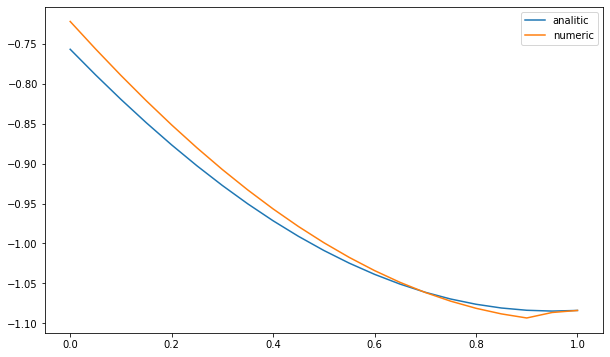

In [560]:
plt.figure(figsize = (10,6))
plt.plot(x,np.vectorize(anal)(x,[t[N] for i in range(L+1)]))
plt.plot(x,U[N])
plt.legend(['analitic','numeric'])
plt.show()

<ipython-input-404-88808ab0e2ba>:27: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('surface.png', dpi=400, quality=100)


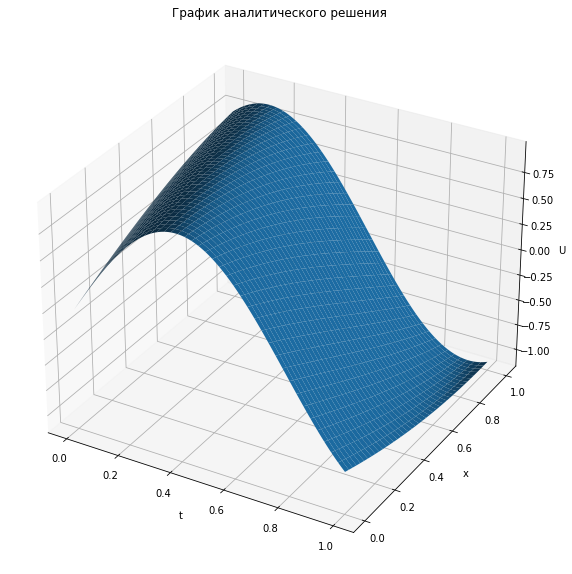

In [404]:
# L = 40
# K = 0.25
# N = int(L/K)

# x = np.arange(0,1+1/(10*L),1/L)
# t = np.arange(0,1+1/(10*N),1/N)

# t_a = []
# for i in range(N+1):
#     for j in range(N+1):
#         t_a.append(t[i])
# t_a = np.array(t_a)

# x_a = np.array([])
# for i in range(N+1):
#     x_a = np.concatenate((x_a,x))    

   
# fig = plt.figure(figsize = (15,10))
# ax = fig.add_subplot(111, projection='3d')
# xgrid, tgrid = np.meshgrid(x, t)
# ax.plot_surface(tgrid, xgrid, anal(xgrid,tgrid))
# ax.set_zlabel('U')
# ax.set_ylabel('x')
# ax.set_xlabel('t')
# ax.set_title('График аналитического решения')
# plt.savefig('surface.png', dpi=400, quality=100)